In [1]:
import os

In [2]:
# Get working directory. 

os.getcwd()

'/Users/zachquinn'

In [3]:
# Import numpy, pandas, math, statsmodels, seaborn, pylab and sklearn.  

import numpy as np
import statistics
from numpy import array 
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import Math, Latex
from IPython.core.display import Image
import pylab 
from scipy.stats import uniform
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats 
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import scale
from collections import Counter 
%matplotlib inline

In [4]:
# Read data set CSV file 
stream_movie = pd.read_csv('/Users/zachquinn/Desktop/DSC_500/MoviesOnStreamingPlatforms_updated.csv')

In [5]:
# Display first five rows of stream_movie dataset 
stream_movie.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
# Display structure of data set 
stream_movie.shape

(16744, 17)

In [7]:
# View columns 
stream_movie.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [8]:
# View null values 
stream_movie.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [99]:
# Creates new variable without N/A values.

movie_stream_data = stream_movie.dropna(how='any')
movie_stream_data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0


In [106]:
# Renames 'Rotten Tomatoes' column and converts to float type.

movie_stream_data.rename(columns = {"Rotten Tomatoes": "RottenTomatoes"}, inplace=True)
print(movie_stream_data['RottenTomatoes'])
movie_stream_data['RottenTomatoes'] = movie_stream_data['RottenTomatoes'].astype(str)
movie_stream_data['RottenTomatoes'] = movie_stream_data['RottenTomatoes'].str.rstrip('%').astype('float')

0        87.0
1        87.0
2        84.0
3        96.0
4        97.0
         ... 
16657     5.0
16671    17.0
16677    13.0
16687     6.0
16705     7.0
Name: RottenTomatoes, Length: 3301, dtype: float64


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
# Conducts correlation test by creating corrMatrix variable 
corrMatrix = movie_stream_data.corr()

In [108]:
# Calls corrMatrix to produce correlation matrix 
corrMatrix

,Unnamed: 0,ID,Year,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
Unnamed: 0,1.000000,1.000000,-0.272865,-0.167637,-0.156393,-0.660177,-0.128726,0.131295,0.780840,NaN,-0.161391
ID,1.000000,1.000000,-0.272865,-0.167637,-0.156393,-0.660177,-0.128726,0.131295,0.780840,NaN,-0.161391
Year,-0.272865,-0.272865,1.000000,-0.113686,-0.044080,0.261093,0.116227,-0.175024,-0.182646,NaN,0.001339
IMDb,-0.167637,-0.167637,-0.113686,1.000000,0.663384,0.053085,0.040980,-0.112537,0.050662,NaN,0.269437
RottenTomatoes,-0.156393,-0.156393,-0.044080,0.663384,1.000000,0.031590,0.059373,-0.112232,0.031392,NaN,0.090563
Netflix,-0.660177,-0.660177,0.261093,0.053085,0.031590,1.000000,-0.230897,-0.608931,-0.205883,NaN,0.105808
Hulu,-0.128726,-0.128726,0.116227,0.040980,0.059373,-0.230897,1.000000,-0.151498,-0.114548,NaN,-0.004477
Prime Video,0.131295,0.131295,-0.175024,-0.112537,-0.112232,-0.608931,-0.151498,1.000000,-0.351726,NaN,-0.031035
Disney+,0.780840,0.780840,-0.182646,0.050662,0.031392,-0.205883,-0.114548,-0.351726,1.000000,NaN,-0.071389
Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


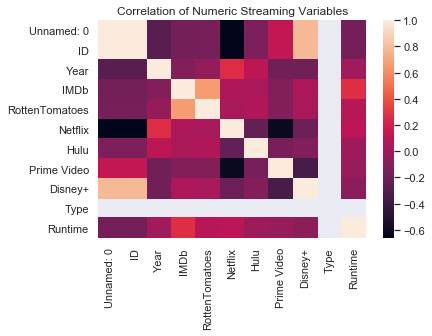

In [109]:
# Creates heatmap of related numeric variables. 

sns.heatmap(movie_stream_data.corr())
plt.title('Correlation of Numeric Streaming Variables')
plt.show()

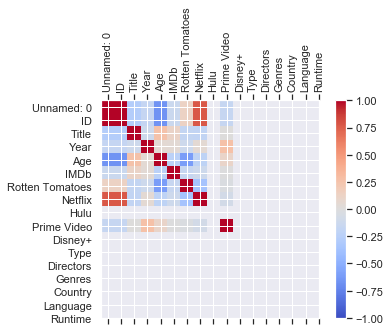

In [13]:
# Creates correlation plot for all variable types. 

corr = movie_stream_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(movie_stream_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(movie_stream_data.columns)
ax.set_yticklabels(movie_stream_data.columns)
plt.show()

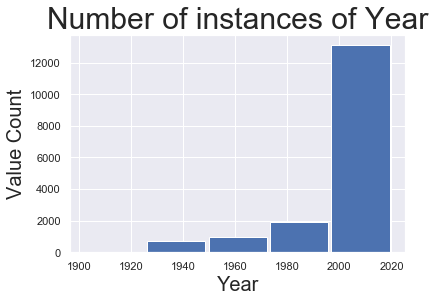

In [14]:
# Plots and labels histogram for number of occurrences of numeric variable 'Year' in data set.

plt.hist(stream_movie.Year, bins = 5, rwidth = 0.95)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Value Count', fontsize = 20)
plt.title('Number of instances of Year', fontsize = 30)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


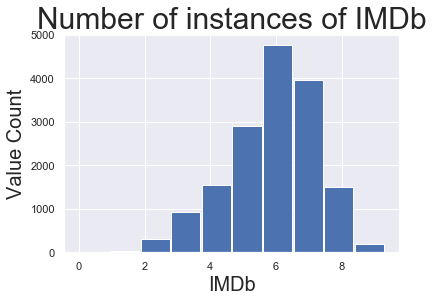

In [15]:
# Plots and labels histogram for number of occurrences of numeric variable 'IMDB' in data set. 

plt.hist(stream_movie.IMDb, bins = 10, rwidth = 0.95)
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Value Count', fontsize = 20)
plt.title('Number of instances of IMDb', fontsize = 30)
plt.show()

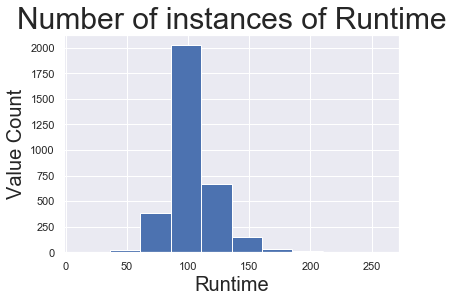

In [16]:
# Plots and labels histogram for number of occurrences of numeric variable 'IMDB' in data set. 
plt.hist(movie_stream_data.Runtime, bins = 10)
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Value Count', fontsize = 20)
plt.title('Number of instances of Runtime', fontsize = 30)
plt.show()

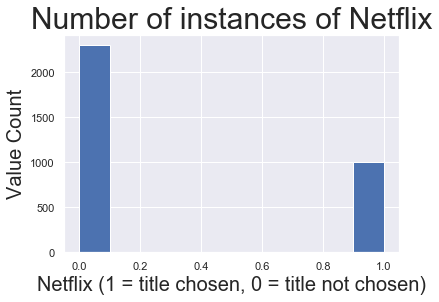

In [96]:
# Plots and labels histogram for instances of 'Netflix' in data set. 

movie_stream_data.Netflix.hist()
plt.xlabel('Netflix (1 = title chosen, 0 = title not chosen)', fontsize = 20)
plt.ylabel('Value Count', fontsize = 20)
plt.title('Number of instances of Netflix', fontsize = 30)
plt.show()

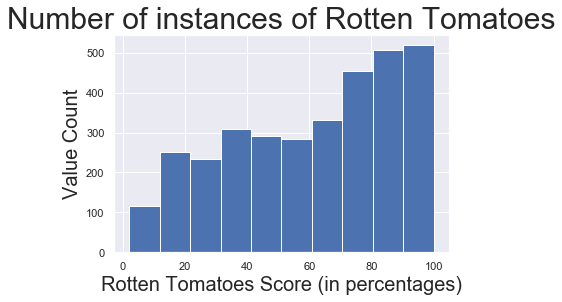

In [110]:
# Plots and labels number of instances of Rotten Tomatoes in data set in percentages. 

movie_stream_data.RottenTomatoes.hist()
plt.xlabel('Rotten Tomatoes Score (in percentages)', fontsize = 20)
plt.ylabel('Value Count', fontsize = 20)
plt.title('Number of instances of Rotten Tomatoes', fontsize = 30)
plt.show()

In [22]:
# Displays descriptive statistics for data set. 

movie_stream_data.describe()

,Unnamed: 0,ID,Year,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.0,3301.000000
mean,5239.267798,5240.267798,2006.134808,6.350530,61.139655,0.302939,0.129658,0.545895,0.101181,0.0,102.710391
std,4479.389204,4479.389204,14.599201,0.992021,27.119615,0.459598,0.335977,0.497965,0.301615,0.0,19.551805
min,0.000000,1.000000,1902.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,1298.000000,1299.000000,2002.000000,5.700000,40.000000,0.000000,0.000000,0.000000,0.000000,0.0,91.000000
50%,4781.000000,4782.000000,2011.000000,6.400000,66.000000,0.000000,0.000000,1.000000,0.000000,0.0,100.000000
75%,6519.000000,6520.000000,2016.000000,7.100000,85.000000,1.000000,0.000000,1.000000,0.000000,0.0,111.000000
max,16705.000000,16706.000000,2020.000000,9.000000,100.000000,1.000000,1.000000,1.000000,1.000000,0.0,260.000000


In [23]:
movie_stream_data['Runtime'].mean(skipna = True)

102.71039079066949

In [24]:
movie_stream_data['Runtime'].mode()

0    90.0
dtype: float64

In [25]:
min(movie_stream_data['Runtime'])

11.0

In [26]:
max(movie_stream_data['Runtime'])

260.0

In [27]:
movie_stream_data['Runtime'].tail()

16657     89.0
16671     87.0
16677    116.0
16687     93.0
16705     93.0
Name: Runtime, dtype: float64

In [28]:
movie_stream_data['Year'].mean(skipna = True)

2006.1348076340503

In [29]:
movie_stream_data['Year'].mode()

0    2017
dtype: int64

In [30]:
min(movie_stream_data['Year'])

1902

In [31]:
max(movie_stream_data['Year'])

2020

In [32]:
movie_stream_data['Year'].tail()

16657    1995
16671    2003
16677    1997
16687    1996
16705    1998
Name: Year, dtype: int64

In [33]:
movie_stream_data['IMDb'].mean(skipna = True)

6.350530142381098

In [34]:
movie_stream_data['IMDb'].mode()

0    6.2
dtype: float64

In [35]:
min(movie_stream_data['IMDb'])

1.6

In [36]:
max(movie_stream_data['IMDb'])

9.0

In [37]:
movie_stream_data['IMDb'].tail()

16657    4.7
16671    3.3
16677    4.7
16687    3.0
16705    4.1
Name: IMDb, dtype: float64

In [38]:
movie_stream_data['RottenTomatoes'].head()

0    87.0
1    87.0
2    84.0
3    96.0
4    97.0
Name: RottenTomatoes, dtype: float64

In [39]:
movie_stream_data['RottenTomatoes'].mean()

61.13965465010603

In [40]:
movie_stream_data['RottenTomatoes'].mode()

0    100.0
dtype: float64

In [41]:
movie_stream_data['RottenTomatoes'].tail()

16657     5.0
16671    17.0
16677    13.0
16687     6.0
16705     7.0
Name: RottenTomatoes, dtype: float64

In [42]:
min(movie_stream_data['RottenTomatoes'])

2.0

In [43]:
max(movie_stream_data['RottenTomatoes'])

100.0

In [44]:
movie_stream_data['Netflix'].head()

0    1
1    1
2    1
3    1
4    1
Name: Netflix, dtype: int64

In [45]:
movie_stream_data['Netflix'].tail()

16657    0
16671    0
16677    0
16687    0
16705    0
Name: Netflix, dtype: int64

In [46]:
movie_stream_data['Netflix'].mean()

0.3029385034837928

In [47]:
movie_stream_data['Netflix'].mode()

0    0
dtype: int64

In [48]:
min(movie_stream_data['Netflix'])

0

In [49]:
max(movie_stream_data['Netflix'])

1

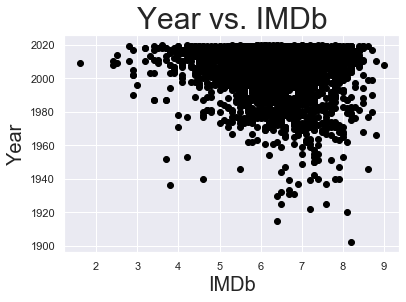

In [50]:
plt.plot(movie_stream_data.IMDb, movie_stream_data.Year, 'o', color = 'black')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Year', fontsize = 20)
plt.title('Year vs. IMDb', fontsize = 30)
plt.show()

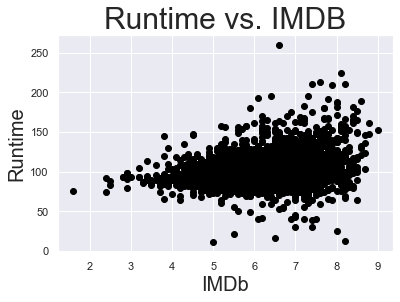

In [51]:
plt.plot(movie_stream_data.IMDb, movie_stream_data.Runtime, 'o', color = 'black')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Runtime', fontsize = 20)
plt.title('Runtime vs. IMDB', fontsize = 30)
plt.show()

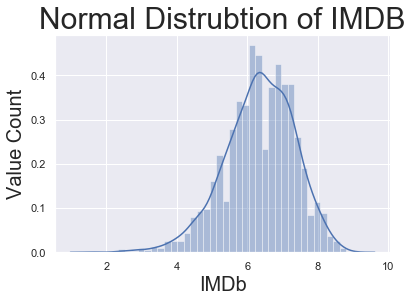

In [52]:
sns.distplot(movie_stream_data['IMDb'], kde = True, bins = 40)
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Value Count', fontsize = 20)
plt.title('Normal Distrubtion of IMDB', fontsize = 30)
plt.show()

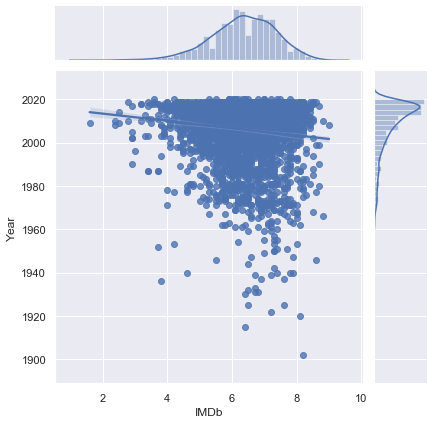

In [53]:
# Creates joint regression plot. 

sns.jointplot(x = 'IMDb', y = 'Year', data = movie_stream_data, kind = 'reg')

In [54]:
# Creates PMF variable.

pmf = movie_stream_data.IMDb.value_counts().sort_index() / len(movie_stream_data.IMDb)

In [55]:
pmf

1.6    0.000303
2.4    0.000606
2.5    0.000606
2.8    0.000606
2.9    0.001515
         ...   
8.5    0.003332
8.6    0.001212
8.7    0.001212
8.8    0.000606
9.0    0.000303
Name: IMDb, Length: 64, dtype: float64

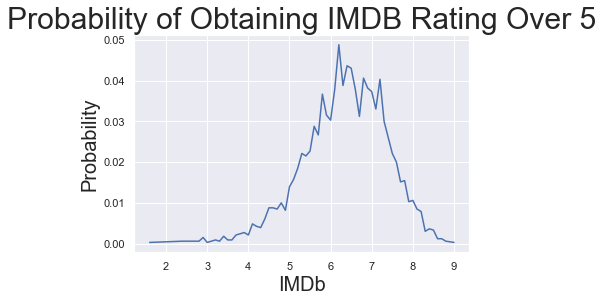

In [91]:
# Plots probability mass function on line graph. 

pmf.plot(kind = 'line')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.title('Probability of Obtaining IMDB Rating Over 5', fontsize = 30)
plt.show()

In [57]:
# Creates second PMF. 
pmf_2 = movie_stream_data.Runtime.value_counts().sort_index() / len(stream_movie.Runtime)

In [58]:
pmf_2

11.0     0.000060
13.0     0.000060
17.0     0.000060
22.0     0.000060
26.0     0.000060
           ...   
209.0    0.000060
210.0    0.000119
213.0    0.000060
224.0    0.000060
260.0    0.000060
Name: Runtime, Length: 145, dtype: float64

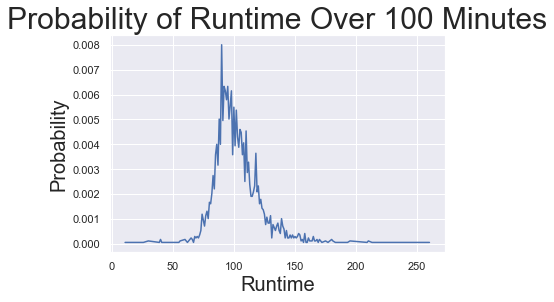

In [59]:
# Plots PMF on line graph. 
pmf_2.plot(kind = 'line')
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.title('Probability of Runtime Over 100 Minutes', fontsize = 30)
plt.show()

In [60]:
counts, bin_edges = np.histogram(stream_movie['Year'], bins = 10, density = True)

In [61]:
pdf = counts/(sum(counts))

In [62]:
print(pdf)
print(bin_edges)

[2.38891543e-04 2.15002389e-03 1.70210225e-02 2.74725275e-02
 2.35905399e-02 3.29670330e-02 5.28547539e-02 6.14548495e-02
 1.66387960e-01 6.15862398e-01]
[1902.  1913.8 1925.6 1937.4 1949.2 1961.  1972.8 1984.6 1996.4 2008.2
 2020. ]


In [63]:
cdf = np.cumsum(pdf)

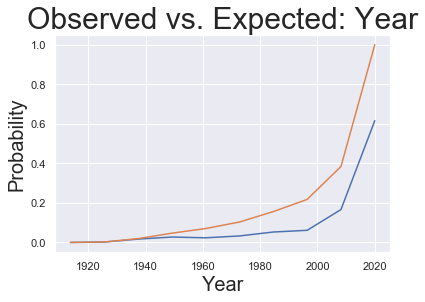

In [64]:
# Plots PDF vs. CDF 
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.title('Observed vs. Expected: Year', fontsize = 30)
plt.show()

In [65]:
# Creates y axis variable for scatter plot. 
y = movie_stream_data['Year']

In [66]:
# Creates x axis variable for scatter plot. 
x1 = movie_stream_data['IMDb']

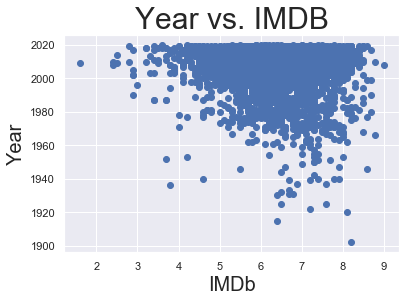

In [67]:
# Creates scatter plot of Year vs. IMDB. 

plt.scatter(x1, y)
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Year', fontsize = 20)
plt.title('Year vs. IMDB', fontsize = 30)
plt.show()

In [68]:
# Creates training data set for linear model. 

train = movie_stream_data.sample(frac=0.8, random_state=200)

In [69]:
# Indexes training data set. 

train.index

Int64Index([ 4047,  4623,   493,  5697,     4,  5022, 16370,  5219,  1442,
             3577,
            ...
             3633,   482,  5727, 16497,  5318,  4476,   624, 16423, 16405,
             1355],
           dtype='int64', length=2641)

In [70]:
# Creates test data set. 

test = movie_stream_data.drop(train.index)

In [71]:
# Defines dependent variable 

depd = train[['Year']]

In [72]:
# Creates and fits linear model using linear regression methodology. 

split_movie_model = linear_model.LinearRegression()
split_movie_model.fit(X = depd, y = train['IMDb'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
split_movie_model.coef_

array([-0.00700743])

In [74]:
split_movie_model.intercept_

20.416020225825612

In [75]:
# Produces overall accuracy score of linear model 
split_movie_model.score(X = depd, y = train['IMDb'])

0.010643664269073483

In [76]:
# Repeats linear regression test for Runtime ~ IMDb. 

train = movie_stream_data.sample(frac=0.8, random_state=200)

In [77]:
train.index

Int64Index([ 4047,  4623,   493,  5697,     4,  5022, 16370,  5219,  1442,
             3577,
            ...
             3633,   482,  5727, 16497,  5318,  4476,   624, 16423, 16405,
             1355],
           dtype='int64', length=2641)

In [78]:
test = movie_stream_data.drop(train.index)

In [79]:
depd = train[['Runtime']]

In [80]:
split_movie_model_2 = linear_model.LinearRegression()
split_movie_model_2.fit(X = depd, y = train['IMDb'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
split_movie_model_2.coef_

array([0.0143464])

In [82]:
split_movie_model_2.intercept_

4.8856996079549

In [83]:
split_movie_model_2.score(X = depd, y = train['IMDb'])

0.0810311458338695

In [84]:
train = movie_stream_data.sample(frac=0.8, random_state=200)

In [85]:
train.index

Int64Index([ 4047,  4623,   493,  5697,     4,  5022, 16370,  5219,  1442,
             3577,
            ...
             3633,   482,  5727, 16497,  5318,  4476,   624, 16423, 16405,
             1355],
           dtype='int64', length=2641)

In [86]:
# Repeats linear regression test for Year ~ Rotten Tomatoes. 
test = movie_stream_data.drop(train.index)

In [87]:
depd = train[['Year']]

In [88]:
split_movie_model_3 = linear_model.LinearRegression()
split_movie_model_3.fit(X = depd, y = train['RottenTomatoes'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
split_movie_model_3.coef_

array([-0.08624816])

In [112]:
split_movie_model_3.intercept_

234.29049913602643

In [89]:
split_movie_model_3.score(X = depd, y = train['RottenTomatoes'])

0.002160606206566773